# Review Data


In [133]:
import yfinance as yf
import pandas as pd
import sys
!{sys.executable} -m pip install pandas-ta
import pandas_ta as ta
import matplotlib.pyplot as plt

In [134]:
df = yf.download(tickers = 'AAPL', start = '2023-01-01', end = '2023-12-31', interval = '1d')
df.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800


In [135]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,170.510817,171.803593,168.962667,170.222273,5.922355e+07
std,17.340361,17.272208,17.538699,17.536308,1.778332e+07
min,123.161949,125.871079,122.324586,124.137232,2.404830e+07
25%,159.947025,160.218333,158.553371,159.396958,4.781208e+07
50%,173.604614,175.138081,171.987054,173.377053,5.511085e+07
75%,185.426689,186.059884,182.954159,184.564613,6.574292e+07
max,196.256561,197.752429,195.156944,196.167407,1.543573e+08


In [136]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data_list = []
# Loop through each ticker and download data from each one 
for ticker in tickers: 
    df = yf.download(tickers = ticker, start = '2023-01-01', end = '2023-12-31', interval = '1d')
    # Check if a column (df.columns) is multi-index (pd.MultiIndex) or not
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    
    # Initialize a new column 'RSI'
    """RSI stands for Relative Strength Index, it measures the velocity and
    magnitude of directional price movements to make predictions based on 
    ratio of upward movements to downward movements over a specified time period (ussually 14 days),
    it ranges from 0 to 100.
    
    If RSI > 70: Overbought condition (potentially overvalued, may see a price pullback)
    If RSI < 30: Oversold condition (potentially undervalued, may see a price bounce)
    """
    # Calculate RSI in 14 days period
    df['RSI'] = ta.rsi(df['Close'], length=14)    
    # Initialize a new column 'SMA_50'
    """
    SMA stands for Simple Moving Average, it is the average closing price over a specific period (in this case, 50 days).
    
    
    """

    df['SMA_50'] = ta.sma(df['Close'], length=50)
    
    # Create a target variable based on future price movement: value = 1 if price increases compared to yesterday, else 0
    df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    # Add a column for ticker symbol
    df['Ticker'] = ticker
    # Drop rows with NaN values
    df.dropna(inplace=True)
    # Append the processed DataFrame to the list
    data_list.append(df)
    
    final_df = pd.concat(data_list, axis=0)
    print(final_df.head(), '\n')
    print(f"Row totals: {len(final_df)}", '\n')
    

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low  ...      SMA_50  Target  Ticker
Date                                            ...                            
2023-03-15  150.946365  151.202887  147.917367  ...  142.745688       1    AAPL
2023-03-16  153.768188  154.370041  149.614418  ...  143.356827       0    AAPL
2023-03-17  152.929550  154.646313  152.219167  ...  143.925778       1    AAPL
2023-03-20  155.297470  155.711873  152.090883  ...  144.568488       1    AAPL
2023-03-21  157.152344  157.270736  154.448939  ...  145.157664       0    AAPL

[5 rows x 9 columns] 

Row totals: 201 




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low  ...      SMA_50  Target  Ticker
Date                                            ...                            
2023-03-15  150.946365  151.202887  147.917367  ...  142.745688       1    AAPL
2023-03-16  153.768188  154.370041  149.614418  ...  143.356827       0    AAPL
2023-03-17  152.929550  154.646313  152.219167  ...  143.925778       1    AAPL
2023-03-20  155.297470  155.711873  152.090883  ...  144.568488       1    AAPL
2023-03-21  157.152344  157.270736  154.448939  ...  145.157664       0    AAPL

[5 rows x 9 columns] 

Row totals: 402 

Price            Close        High         Low  ...      SMA_50  Target  Ticker
Date                                            ...                            
2023-03-15  150.946365  151.202887  147.917367  ...  142.745688       1    AAPL
2023-03-16  153.768188  154.370041  149.614418  ...  143.356827       0    AAPL
2023-03-17  152.929550  154.646313  152.219167  ...  143.925778       1    AAP

The first step is to do data wrangling and exploratory data analysis to make sure the data is cleaned and we can extract valuable insights. Furthermore, we also conduct feature engineering with RSI, SMA_50, Target, and Ticker variables.

In [137]:
final_df['Ticker'].value_counts()

Ticker
AAPL     201
MSFT     201
GOOGL    201
AMZN     201
TSLA     201
Name: count, dtype: int64

In [138]:
final_df.shape


(1005, 9)

In [139]:
final_df.head()


Price,Close,High,Low,Open,Volume,RSI,SMA_50,Target,Ticker
Date,,,,,,,,,
2023-03-15,150.946365,151.202887,147.917367,149.170407,77167900,59.145489,142.745688,1,AAPL
2023-03-16,153.768188,154.370041,149.614418,150.127476,76161100,63.449912,143.356827,0,AAPL
2023-03-17,152.929550,154.646313,152.219167,153.995126,98944600,61.380095,143.925778,1,AAPL
2023-03-20,155.297470,155.711873,152.090883,152.998607,73641400,64.865197,144.568488,1,AAPL
2023-03-21,157.152344,157.270736,154.448939,155.218534,73938300,67.350678,145.157664,0,AAPL


In [140]:
final_df['Target'].value_counts(normalize=True)

Target
1    0.543284
0    0.456716
Name: proportion, dtype: float64

In [141]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Features and target variables
X = final_df[['RSI', 'SMA_50', 'Close', 'Volume']]
y = final_df['Target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42, stratify = y)

# Standardize the feature variables
scaler = StandardScaler()
# Standardize the training data by calculating the z-scores
X_train_scaled = scaler.fit_transform(X_train)
# Standardize the testing data using the same parameters as training data
X_test_scaled = scaler.transform(X_test)

In [142]:
from sklearn.ensemble import RandomForestClassifier
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators= 100, random_state = 42)
xgb_model = XGBClassifier(n_estimators= 100, random_state = 42, learning_rate = 0.1) 

# Train the model
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
rf_predict = rf_model.predict(X_test_scaled)
xgb_predict = xgb_model.predict(X_test_scaled)

# Calculate accuracy for both models
rf_accuracy = accuracy_score(y_test, rf_predict)
xgb_accuracy = accuracy_score(y_test, xgb_predict)

# Evualuate Random Forest model and XGBoost model
print(f'Random Forest Classifier Accuracy Results: {rf_accuracy:.2f}%')
print(f'XGBoost Classifier Accuracy Results: {xgb_accuracy:.2f}%')

Random Forest Classifier Accuracy Results: 0.58%
XGBoost Classifier Accuracy Results: 0.56%


We can see that the Random Forest Classifer only has slightly higher accuracy than XGBoost Classifier

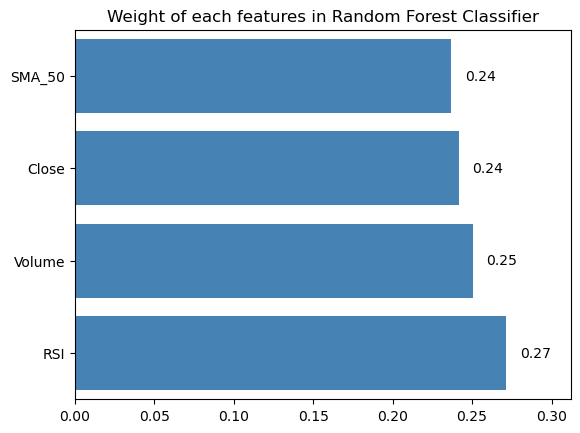

In [143]:
rf_features_weight = pd.Series(rf_model.feature_importances_, index = ['RSI', 'SMA_50', 'Close', 'Volume'])
rf_features_weight = rf_features_weight.sort_values(ascending=False)
rf_features_weight.plot(kind = 'barh', title = 'Weight of each features in Random Forest Classifier')
rf_bars_value = plt.barh(rf_features_weight.index, rf_features_weight.values, color = 'steelblue')
plt.bar_label(rf_bars_value, fmt = '%.2f', padding = 10)
plt.xlim(0, max(rf_features_weight.values * 1.15)) # Expand the x_axis limit for better visibility
plt.show()

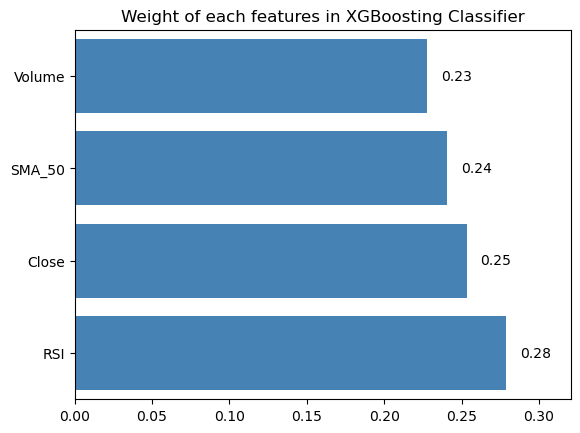

In [144]:
xgb_features_weight = pd.Series(xgb_model.feature_importances_, index = ['RSI', 'SMA_50', 'Close', 'Volume'])
xgb_features_weight = xgb_features_weight.sort_values(ascending=False)
xgb_features_weight.plot(kind = 'barh', title = 'Weight of each features in XGBoosting Classifier')
xgb_bars_value = plt.barh(xgb_features_weight.index, xgb_features_weight.values, color = 'steelblue')
plt.bar_label(xgb_bars_value, fmt = '%.2f', padding = 10)
plt.xlim(0, max(xgb_features_weight.values) * 1.15) # Expand the x_axis limit for better visibility
plt.show()

The feature importance analysis reveals that in both classifiers (Random Forest and XGBoost), the weights of the four features are relatively uniform. This indicates that all selected variables contribute significantly and almost equally to the models' predictive power. Consequently, there is no evidence of redundant features, and no feature pruning is required at this stage to improve model accuracy.

In [145]:
from sklearn.model_selection import GridSearchCV # Library for finding the hyperparameters

# Define the hyperparamenters grid for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize GridSearchCV for Random Forest Classifier
rf_grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = rf_param_grid,
                           cv = 5,
                           n_jobs = -1, # Use all available cores
                           scoring = 'precision')

rf_grid_search.fit(X_train_scaled, y_train)

# Tuning results
print(f'Best Hyperparameters for Random Forest Classifier: {rf_grid_search.best_params_}', '\n')
print(f'Best Accuracy for Random Forest Classifier: {rf_grid_search.best_score_ * 100:.2f}%', '\n')

best_search_rf_model = rf_grid_search.best_estimator_
rf_y_pred = best_search_rf_model.predict(X_test_scaled)
rf_y_pred = pd.Series(rf_y_pred).value_counts(normalize = True)
print('Predict')
print(rf_y_pred, '\n')
print(y_test.value_counts(normalize = True))


Best Hyperparameters for Random Forest Classifier: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50} 

Best Accuracy for Random Forest Classifier: 58.55% 

Predict
1    0.626866
0    0.373134
Name: proportion, dtype: float64 

Target
1    0.542289
0    0.457711
Name: proportion, dtype: float64


In [146]:
xgb_best_params = {
    'n_estimators' : [50,100, 200], 
    'learning_rate' : [0.01, 0.1, 0.2, 0.3], # most important hyperparameter in order to balance the learning process of the model to prevent overfitting
    'max_depth' : [3, 4, 5, 6], # keep it from 3-6, deeper trees may lead to overfitting,
    'min_child_weight' : [1, 3, 5] #  keep it from 1-5, the higher weight prevent the model from learning the actual patterns of the data
    
}

xgb_grid_search = GridSearchCV(estimator = xgb_model,
                           param_grid = xgb_best_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           scoring = 'precision') 

xgb_grid_search.fit(X_train_scaled, y_train)

print(f'Best Hyperparameters for XGBoost Classifier: {xgb_grid_search.best_params_}', '\n')
print(f'Best Accuracy for XGBoost Classifier: {xgb_grid_search.best_score_ * 100:.2f}%', '\n')

best_search_xgb_model = xgb_grid_search.best_estimator_
xgb_y_pred = best_search_xgb_model.predict(X_test_scaled)
xgb_y_pred = pd.Series(xgb_y_pred).value_counts(normalize = True)
print('Predict')
print(xgb_y_pred, '\n')
print(y_test.value_counts(normalize = True))



Best Hyperparameters for XGBoost Classifier: {'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100} 

Best Accuracy for XGBoost Classifier: 60.66% 

Predict
1    0.59204
0    0.40796
Name: proportion, dtype: float64 

Target
1    0.542289
0    0.457711
Name: proportion, dtype: float64


After hyperparamter tuning for RF and XGB models, we can see that XGB has outperformed RF in accuracy (60.66% compared to 58.55%). This indicates that through meticulous optimization of hyperparameters, the accuracy can increase much higher. The superior result of XGBoost also indicates its better capability in handling the complexity and noise inherent in financial data. The reason why XGBoost has better performance than RF is because it has better regularization built-in, which prevent overfitting from noises in financial data. Also, XGBoosting learns from its mistakes by having learning rate which helps fine-tune for each trees.

Moreover, the predictions compared to the test results reveals us some valuable insights. While RF model predicts an upward trend in 62.7% of cases (this could likely be affected by market noises or overfitting), the XGBoosting model are more likely to provide a more realistic representation of the market's behavior. (59.2% to 54.2%).

In [147]:
from sklearn.metrics import precision_score

rf_y_pred = best_search_rf_model.predict(X_test_scaled)
xgb_y_pred = best_search_xgb_model.predict(X_test_scaled)

rf_precision = precision_score(y_test, rf_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)

print(f'RF precision: {rf_precision:.2f}')
print(f'XGB precision: {xgb_precision:.2f}')




RF precision: 0.59
XGB precision: 0.62


The Precision score for XGBoost is slightly higher than that of Random Forest, outperforming it by 3%. This indicates that XGBoost is more reliable when predicting upward movements. For instance, when the model issues a 'Buy' signal, there is a 62% probability that the stock will actually increase, suggesting that XGBoost is more resilient to market noise than Random Forest.

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_y_scores = best_search_rf_model.predict_proba(X_test_scaled)[:,1] 
# Instead of using predict which has an output of 0 or 1, 
# predict_proba creates probability of value 0 or value 1 (e.g [0.3, 0.7])
# We only slice value 1 only.
rf_y_pred = (rf_y_scores > 0.7).astype(int)
cm_rf = confusion_matrix(y_test, rf_y_pred)
print(cm_rf)

original_orders_rf = (rf_y_scores > 0.5).sum()
strict_orders_rf = (rf_y_scores > 0.7).sum()
print()
print(f"Orginial orders (0.5 threshold): {original_orders_rf}")
print(f"Quality orders (0.7 threshold): {strict_orders_rf}")



[[84  8]
 [87 22]]

Orginial orders (0.5 threshold): 126
Quality orders (0.7 threshold): 30


In [149]:
xgb_y_scores = best_search_xgb_model.predict_proba(X_test_scaled)[:,1]
xgb_y_pred = (xgb_y_scores > 0.7).astype(int)
cm_xgb = confusion_matrix(y_test, xgb_y_pred)
print(cm_xgb)

original_orders_xgb = (xgb_y_scores > 0.5).sum()
strict_orders_xgb = (xgb_y_pred > 0.7).sum()
print()
print(f"Orginial orders (0.5 threshold): {original_orders_xgb}")
print(f"Quality orders (0.7 threshold): {strict_orders_xgb}")



[[73 19]
 [79 30]]

Orginial orders (0.5 threshold): 119
Quality orders (0.7 threshold): 49


We examine the Confusion Matrix for each model to evaluate the frequency of False Positives and False Negatives (e.g., the model predicting a downward trend when the actual movement is upward). To mitigate misleading trend predictions, we implement a custom probability threshold. By increasing this requirement to 70%, we ensure the model only issues a 'Buy' signal when it is highly certain, rather than relying on a marginal 51% probability which often leads to unreliable results. Furthermore, the results demonstrate that XGBoost maintains a higher quality in issuing 'Buy' signals even after increasing the threshold to 0.7. This confirms that the XGBoost model is more robust and superior for this stock prediction project, as it provides more reliable entry points by effectively filtering out market volatility.

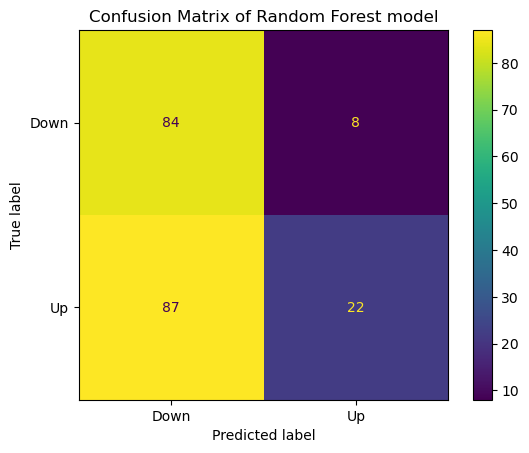

In [150]:
# Visualisation a confusion matrix for RF model
rf_disp = ConfusionMatrixDisplay(confusion_matrix= cm_rf, display_labels = ['Down','Up'])
rf_disp.plot(cmap = 'viridis')
plt.title('Confusion Matrix of Random Forest model')
plt.show()


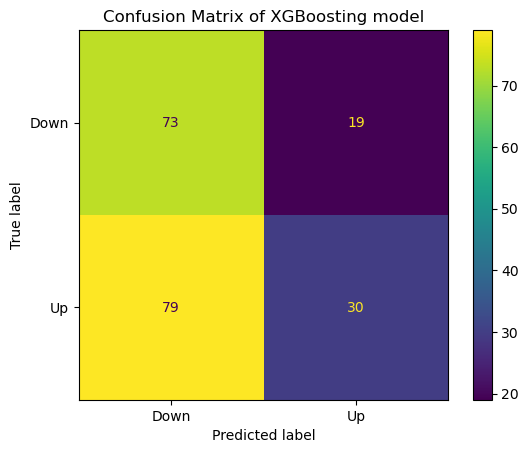

In [151]:
# Visualisation a confusion matrix for RF model
xgb_disp = ConfusionMatrixDisplay(confusion_matrix= cm_xgb, display_labels = ['Down','Up'])
xgb_disp.plot(cmap = 'viridis')
plt.title('Confusion Matrix of XGBoosting model')
plt.show()


Visualizing the Confusion Matrix with clear labels ('Down' vs 'Up') provides a direct look at the model's reliability. By observing the distribution, we can visually confirm that while both models improve at a 0.7 threshold, XGBoost maintains a cleaner separation with fewer False Positives compared to Random Forest.

In [152]:
import joblib

rf_filename = '/Users/trieuecom/Projects/ML-Powered-Stock-Direction-Classifier/models/best_random_forest_model.pkl'
joblib.dump(best_search_rf_model, rf_filename)
print(f'Model sucessfully dumped to {rf_filename}')

Model sucessfully dumped to /Users/trieuecom/Projects/ML-Powered-Stock-Direction-Classifier/models/best_random_forest_model.pkl


In [153]:
xgb_filename = '/Users/trieuecom/Projects/ML-Powered-Stock-Direction-Classifier/models/best_xgb_model.pkl'
joblib.dump(best_search_xgb_model, xgb_filename)
print(f'Model sucessfully dumped to {xgb_filename}')

Model sucessfully dumped to /Users/trieuecom/Projects/ML-Powered-Stock-Direction-Classifier/models/best_xgb_model.pkl


In [154]:
scaler_filename = '/Users/trieuecom/Projects/ML-Powered-Stock-Direction-Classifier/models/scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f'Scaler sucessfully dumped to {scaler_filename}')


Scaler sucessfully dumped to /Users/trieuecom/Projects/ML-Powered-Stock-Direction-Classifier/models/scaler.pkl


Dumping all the fine-tuned models for automation and the scaler to make sure the data is standardized.